# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [6]:
! ls ml-latest-small/

UsageError: %%bash is a cell magic, but the cell body is empty.


In [96]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [117]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [118]:
# write pandas code here
print(movie.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


# Q 2 (.25 point) Check datatype of each of the columns

In [119]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [120]:
# write pandas code here
unique_genre = set([g for row in movie["genres"].str.split("|").tolist() for g in row])
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [121]:
# write pandas code here
for g in unique_genre:
    movie[g] = movie["genres"].str.contains(g)
movie.head()

C:\Users\benja\AppData\Local\Temp/ipykernel_22380/3093493409.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  movie[g] = movie["genres"].str.contains(g)


,movieId,title,genres,Fantasy,(no genres listed),Western,Romance,IMAX,Horror,Comedy,...,Children,Thriller,Action,Mystery,War,Musical,Animation,Film-Noir,Drama,Crime
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [133]:
# write pandas code here
year_re = "\.*\((\d{4})\.*"
movie["year"] = movie["title"].str.extract(year_re)
# treat 0 as na
movie["year"].fillna("0", inplace=True)
movie["year"] = movie["year"].apply(int)
movie.sample(30)[["title","year"]]
# movie[movie["year"].isna()]["title"]

,title,year
1691,Rush Hour (1998),1998
4359,Respiro (2002),2002
3888,"Crocodile Hunter: Collision Course, The (2002)",2002
873,"Ruling Class, The (1972)",1972
5030,"Thin Man Goes Home, The (1945)",1945
5160,Shrek 2 (2004),2004
4686,Hoffa (1992),1992
6070,"Yours, Mine and Ours (2005)",2005
6873,"Angus, Thongs and Perfect Snogging (2008)",2008
5288,Biggles (1986),1986


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

c:\users\benja\git-projects\bitbucket\du_4447_homework\venvs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


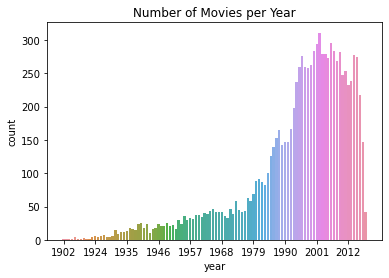

In [144]:
# write code here.
import seaborn as sns
import matplotlib.pyplot as plt
movie_counts = pd.DataFrame(movie[movie["year"]>0].groupby(["year"])["movieId"].count())
movie_counts = movie_counts.rename(columns={"movieId":"count"})
movie_counts = movie_counts.reset_index()
movie_counts.columns
movie_counts
sns.barplot("year","count", data=movie_counts)
plt.title("Number of Movies per Year")
plt.locator_params(axis="x", nbins=10)
#plt.xticks(range(movie["year"].min(), movie["year"].max(),10))
# movie_counts["year"].min()

there was a rapid increase in the number of movies per year around 1980, but that has reversed after 2001. The decrease is slower than the increase.

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [3]:
 # write pandas code here

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [4]:
# Write your code here.

